In [1]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt
import copy
import seaborn as sns

In [2]:
data = pd.read_csv('iris-data.csv', header=None).to_numpy()
labels = pd.read_csv('iris-labels.csv', header=None).to_numpy()
data = data / np.max(data)

In [68]:
def coordinates(data_point, weight):
        # Find the distance
        fourdim_distance = np.sqrt(np.subtract(weight,data_point)**2)
        distance = np.sum(fourdim_distance, axis=2)
        # Find the index of the shortest distance
        flatten_position = np.argmin(distance.flatten())
        return flatten_position // 40 , flatten_position % 40

In [69]:
w = np.random.random((40,40,4))
w_initial = w.copy()
learning_rate = 0.1
learning_rate_decay = 0.01
sigma = 10
sigma_decay = 0.05
epochs = 10

for epoch in range(epochs):
  learning_rate = learning_rate*np.exp(-learning_rate_decay*epoch)
  sigma = sigma*np.exp(-sigma_decay*epoch)

  for _ in range(len(data)):
    # Pick a random datapoint
    x = data[random.randint(0,len(data)-1)]

    # Find the distance
    fourdim_distance = np.sqrt(np.subtract(w,x)**2)
    distance = np.sum(fourdim_distance, axis=2)

    # Find the index of the shortest distance
    flatten_position = np.argmin(distance.flatten())
    i_0,j_0 = flatten_position // 40 , flatten_position % 40

    # If distance < 3/sigma, update weight
    if distance[i_0,j_0] < 3/sigma:
      delta_w = np.zeros((40, 40, 4))
      for i in range(40):
          for j in range(40):
              h = np.exp(-np.divide(np.abs((i - i_0) - (j - j_0))**2, 2*(sigma**2)))
              delta_w[i,j,:] = learning_rate*h*(x - w[i,j])
      w += delta_w

In [70]:
initial_coordinates = np.array([coordinates(data_point, w_initial) for data_point in data])
trained_coordinates = np.array([coordinates(data_point, w) for data_point in data])

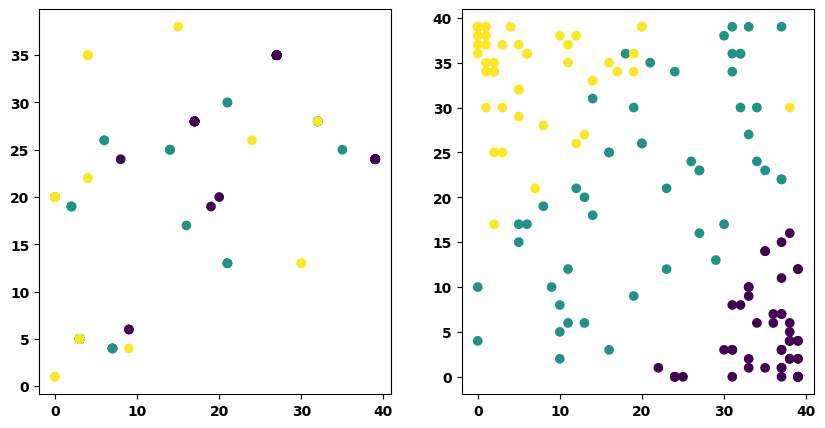

In [71]:
#color_map = sns.dark_palette((0.5, 0.75, 0.9), as_cmap=True)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(initial_coordinates[:,0], initial_coordinates[:,1], c=labels)
ax[1].scatter(trained_coordinates[:,0], trained_coordinates[:,1], c=labels)